In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load your dataset
df = pd.read_csv("final_datausage_cleaned.csv")  # replace with your file path

# 2. Define target and features
target = 'staff_count'  # or 'beds', depending on which one you're predicting
X = df.drop(columns=[target])
y = df[target]

# 3. Separate categorical and numerical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

# 4. Preprocessing: One-hot encode categorical, scale numeric
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# 5. Create the pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Fit the model
pipeline.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 9. Feature importances
rf_model = pipeline.named_steps['rf']
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()
importances = pd.Series(rf_model.feature_importances_, index=feature_names)
top_importances = importances.sort_values(ascending=False).head(20)
print("\nTop 20 Important Features:")
print(top_importances)


RMSE: 0.00
R²: 1.00

Top 20 Important Features:
cat__state_Selangor             2.541657e-01
cat__state_Sabah                2.247731e-01
cat__state_Sarawak              2.127551e-01
cat__state_Johor                8.363201e-02
cat__state_Perak                4.439969e-02
cat__state_W.P. Labuan          3.808611e-02
cat__state_Kelantan             2.643449e-02
cat__state_Negeri Sembilan      2.098306e-02
cat__state_Pahang               1.906695e-02
cat__state_W.P. Putrajaya       1.733516e-02
cat__strata_Urban               1.662079e-02
cat__state_Melaka               1.333394e-02
cat__strata_Non-Urban           1.159060e-02
num__beds                       7.688424e-03
cat__state_W.P. Kuala Lumpur    6.526344e-03
cat__state_Terengganu           2.600787e-03
cat__state_Pulau Pinang         7.613926e-06
cat__state_Perlis               4.351350e-08
cat__state_Kedah                3.838610e-08
cat__age_70-74                  0.000000e+00
dtype: float64


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.00
R² Score: 1.00

Top 20 Important Features:
cat__state_Selangor             2.541657e-01
cat__state_Sabah                2.247731e-01
cat__state_Sarawak              2.127551e-01
cat__state_Johor                8.363201e-02
cat__state_Perak                4.439969e-02
cat__state_W.P. Labuan          3.808611e-02
cat__state_Kelantan             2.643449e-02
cat__state_Negeri Sembilan      2.098306e-02
cat__state_Pahang               1.906695e-02
cat__state_W.P. Putrajaya       1.733516e-02
cat__strata_Urban               1.662079e-02
cat__state_Melaka               1.333394e-02
cat__strata_Non-Urban           1.159060e-02
num__beds                       7.688424e-03
cat__state_W.P. Kuala Lumpur    6.526344e-03
cat__state_Terengganu           2.600787e-03
cat__state_Pulau Pinang         7.613926e-06
cat__state_Perlis               4.351350e-08
cat__state_Kedah                3.838610e-08
cat__age_70-74                  0.000000e+00
dtype: float64


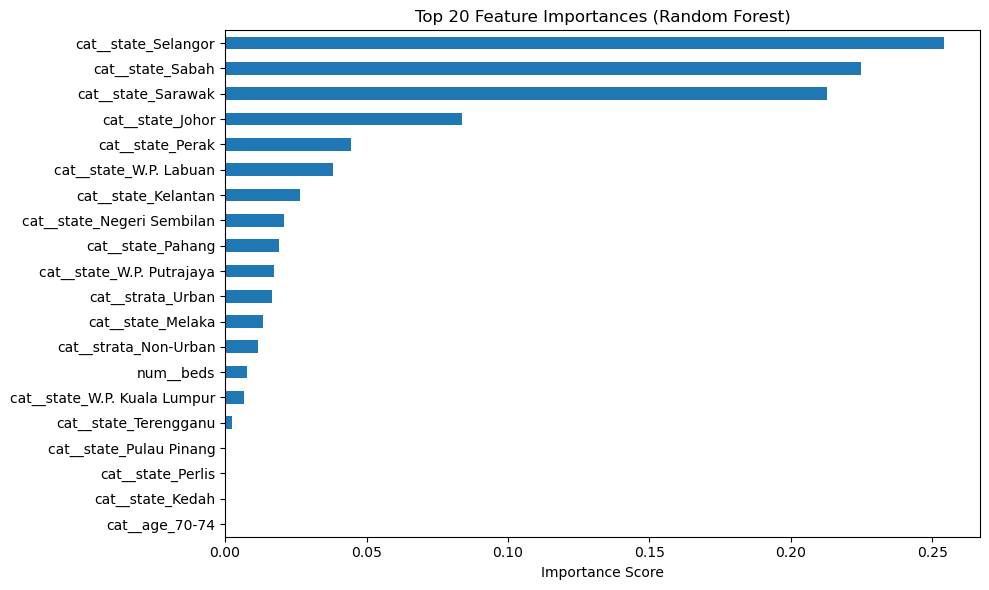

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("final_datausage_cleaned.csv")  # Replace with your file path

# 2. Define target and features
target = 'staff_count'  # or 'beds'
X = df.drop(columns=[target])
y = df[target]

# 3. Split feature types
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

# 4. Preprocessing: encode categoricals, scale numerics
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# 5. Define the pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train model
pipeline.fit(X_train, y_train)

# 8. Evaluate model
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. Feature importances
rf_model = pipeline.named_steps['rf']
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()
importances = pd.Series(rf_model.feature_importances_, index=feature_names)

# Top 20 important features
top_features = importances.sort_values(ascending=False).head(20)
print("\nTop 20 Important Features:")
print(top_features)

# 10. Plot (optional)
top_features.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [7]:
# 1. Load dataset
df = pd.read_csv("final_datausage_cleaned.csv")

In [15]:
# Aggregrate Data

# 1. Group by year, state, and strata (Urban/Non-Urban)
grouped = df.groupby(['year', 'state', 'strata'])

# 2. Aggregate key metrics
df_agg = grouped.agg({
    'population': 'sum',
    'urban_population': 'mean',
    'urban_population_(%_of_total_population)': 'mean',
    'beds': 'sum',
    'staff_count': 'sum',
    'beds_per_1000': 'mean',
    'staff_per_1000': 'mean',
}).reset_index()

# 3. Extract elderly population (rows where is_elderly = True)
elderly_df = df[df['is_elderly']].groupby(['year', 'state', 'strata'])['population'].sum().reset_index()
elderly_df.rename(columns={'population': 'elderly_population'}, inplace=True)

# 4. Merge elderly population into the main dataset
df_agg = pd.merge(df_agg, elderly_df, on=['year', 'state', 'strata'], how='left')
df_agg['elderly_population'] = df_agg['elderly_population'].fillna(0)

# 5. Compute elderly ratio
df_agg['elderly_ratio'] = df_agg['elderly_population'] / df_agg['population'] * 100


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define features and target
features = ['year', 'state', 'strata', 'population', 
            'urban_population_(%_of_total_population)', 'elderly_ratio']
target = 'beds'

X = df_agg_step[features]
y = df_agg_step[target]

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 3: Define preprocessing (encode categorical variables)
categorical_cols = ['state', 'strata']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Step 4: Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 5: Train the model
pipeline.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


NameError: name 'df_agg_step' is not defined

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\Jia Yi\Downloads\AgeWise\Dataset\final_datausage_cleaned.csv")

# Aggregate by year, state, and strata
grouped = df.groupby(['year', 'state', 'strata'])
df_agg_step = grouped.agg({
    'population': 'sum',
    'urban_population': 'mean',
    'urban_population_(%_of_total_population)': 'mean',
    'beds': 'sum',
    'staff_count': 'sum',
    'beds_per_1000': 'mean',
    'staff_per_1000': 'mean',
}).reset_index()

# Compute elderly population per group
elderly_df = df[df['is_elderly']].groupby(['year', 'state', 'strata'])['population'].sum().reset_index()
elderly_df.rename(columns={'population': 'elderly_population'}, inplace=True)

# Merge and calculate elderly ratio
df_agg_step = pd.merge(df_agg_step, elderly_df, on=['year', 'state', 'strata'], how='left')
df_agg_step['elderly_population'] = df_agg_step['elderly_population'].fillna(0)
df_agg_step['elderly_ratio'] = df_agg_step['elderly_population'] / df_agg_step['population'] * 100

# Define features and target
features = ['year', 'state', 'strata', 'population', 
            'urban_population_(%_of_total_population)', 'elderly_ratio']
target = 'beds'

X = df_agg_step[features]
y = df_agg_step[target]

# Train-test and split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Preprocess categorical features
categorical_cols = ['state', 'strata']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Build Random Forest pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 704290.72
R² Score: 0.74


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# FINAL VERSION (WITHOUT PLOT)

Model Evaluation:
RMSE: 704290.72
MAE: 557836.72
R²: 0.74

Top 10 Important Features:
remainder__population           0.812351
remainder__elderly_ratio        0.061891
cat__state_Sarawak              0.059876
cat__state_Selangor             0.013631
cat__state_Perak                0.010550
cat__strata_Non-Urban           0.007440
cat__state_Perlis               0.007313
cat__state_W.P. Kuala Lumpur    0.006601
cat__state_W.P. Putrajaya       0.004994
cat__state_Terengganu           0.004530
dtype: float64


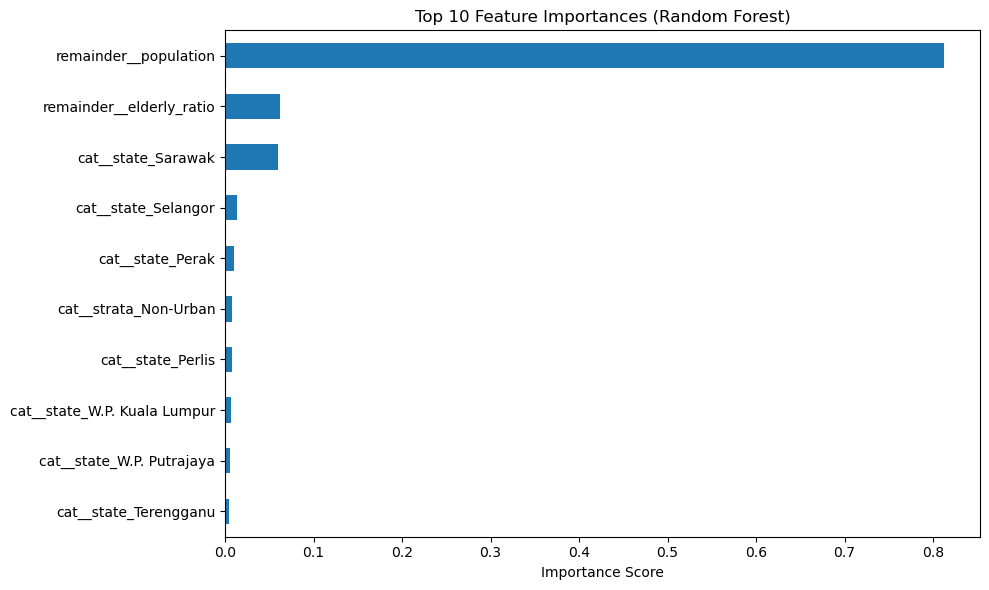

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split#
from sklearn.ensemble import RandomForestRegressor#
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error#


# Load the processed dataset
df = pd.read_csv(r"C:\Users\Jia Yi\Downloads\AgeWise\Dataset\final_datausage_cleaned.csv")

# Aggregate data by year, state and strata
grouped = df.groupby(['year', 'state', 'strata'])
df_agg_step = grouped.agg({
    'population': 'sum',
    'urban_population': 'mean',
    'urban_population_(%_of_total_population)': 'mean',
    'beds': 'sum',
    'staff_count': 'sum',
    'beds_per_1000': 'mean',
    'staff_per_1000': 'mean',
}).reset_index()

# Calculate elderly population per group
elderly_df = df[df['is_elderly']].groupby(['year', 'state', 'strata'])['population'].sum().reset_index()
elderly_df.rename(columns={'population': 'elderly_population'}, inplace=True)

# Merge and calculate elderly ratio
df_agg_step = pd.merge(df_agg_step, elderly_df, on=['year', 'state', 'strata'], how='left')
df_agg_step['elderly_population'] = df_agg_step['elderly_population'].fillna(0)
df_agg_step['elderly_ratio'] = df_agg_step['elderly_population'] / df_agg_step['population'] * 100

# Define features and target
features = ['year', 'state', 'strata', 'population', 
            'urban_population_(%_of_total_population)', 'elderly_ratio']
target = 'beds'

X = df_agg_step[features]
y = df_agg_step[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define preprocessing for categorical columns
categorical_cols = ['state', 'strata']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# Feature importance
rf_model = pipeline.named_steps['regressor']
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = pd.Series(rf_model.feature_importances_, index=feature_names)

# Top 10 important features
top_features = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Important Features:")
print(top_features)



Model Evaluation (without population):
RMSE: 1185954.37
MAE: 1054365.94
R²: 0.25

Top 10 Feature Importances (No Population):
elderly_ratio              0.347084
state_Sabah                0.139922
state_Selangor             0.120081
state_Perak                0.092645
state_Sarawak              0.088836
strata_Urban               0.054845
state_Perlis               0.044371
strata_Non-Urban           0.044167
state_W.P. Kuala Lumpur    0.021531
state_W.P. Putrajaya       0.011707
dtype: float64


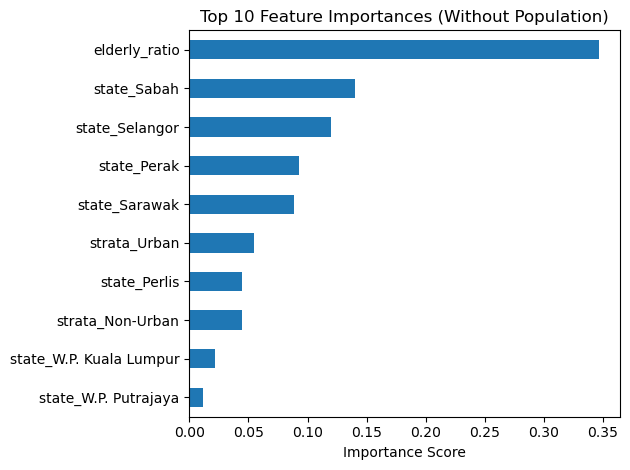

In [35]:
# 1. Modify features (exclude 'population')
features_wo_population = ['year', 'state', 'strata', 
                          'urban_population_(%_of_total_population)', 'elderly_ratio']
target = 'beds'

X = df_agg_step[features_wo_population]
y = df_agg_step[target]

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Redefine categorical encoding
categorical_cols = ['state', 'strata']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# 4. Rebuild the pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 5. Train the model
pipeline.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation (without population):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# 7. Feature Importance Analysis
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
numeric_features = [col for col in features_wo_population if col not in categorical_cols]
all_feature_names = list(ohe_feature_names) + numeric_features

rf_model = pipeline.named_steps['regressor']
importances = pd.Series(rf_model.feature_importances_, index=all_feature_names).sort_values(ascending=False)

# 8. Display top 10 features
print("\nTop 10 Feature Importances (No Population):")
print(importances.head(10))

# 9. Optional: Plot feature importances
import matplotlib.pyplot as plt

importances.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Without Population)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
